In [1]:
"""
Classification
	Logistic Regression
2. The data contains lists of octamers (8 amino acids) and a flag (-1 or 1) depending on whether HIV-1 
protease will cleave in the central position (between amino acids 4 and 5). Build a machine learning  model 
for the dataset, please refer document inside zip file for additional information
"""

'\nClassification\n\tLogistic Regression\n2. The data contains lists of octamers (8 amino acids) and a flag (-1 or 1) depending on whether HIV-1 \nprotease will cleave in the central position (between amino acids 4 and 5). Build a machine learning  model \nfor the dataset, please refer document inside zip file for additional information\n'

In [2]:
#import libraries
import pandas as pd
import seaborn as sb
import numpy as np
from matplotlib import pyplot as plt  
#library for feature scaling
from sklearn.preprocessing import StandardScaler
# #Classification library
from sklearn.linear_model import LogisticRegression

import pickle 
import os, sys
import csv
# ignore warnings
import warnings
warnings.filterwarnings('ignore')

import importlib.util

In [3]:
# importing template file 
spec = importlib.util.spec_from_file_location("Util_class", "/home/admin1/PycharmProjects/Machine-Learning/Week10/Util/util.py")
foo = importlib.util.module_from_spec(spec)
spec.loader.exec_module(foo)
# creating object of Template class
obj_util = foo.Util_class()

In [4]:
# load dataset
dataset_original = pd.read_csv ("impensData.txt", delimiter = ",",names=["Peptides", "Result"])
dataset = dataset_original
dataset.head()

,Peptides,Result
0,AAAGKSGG,-1
1,AAAVDAGM,-1
2,AAGKSGGG,-1
3,AALALEYG,1
4,AANDGPMP,-1


In [5]:
print("Dataset has {} rows and {} Columns".format(dataset.shape[0],dataset.shape[1])) 

Dataset has 947 rows and 2 Columns


In [6]:
# check dataset information
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 947 entries, 0 to 946
Data columns (total 2 columns):
Peptides    947 non-null object
Result      947 non-null int64
dtypes: int64(1), object(1)
memory usage: 14.9+ KB


In [7]:
# descibe the dataset
dataset.describe().T

,count,mean,std,min,25%,50%,75%,max
Result,947.0,-0.685322,0.728625,-1.0,-1.0,-1.0,-1.0,1.0


In [8]:
# handling missing data if nessesary
"""
if missing values are present
imputer = Imputer(missing_values=0, axis=0)
imputer = imputer.fit(x_data[:, 3:16])
"""
dataset.isnull().sum()

Peptides    0
Result      0
dtype: int64

In [9]:
#check for NAN values
dataset.isna().sum()

Peptides    0
Result      0
dtype: int64

In [10]:
# check for duplicate values
dataset.duplicated().sum()

0

Skewness of y is 1.885119414256559


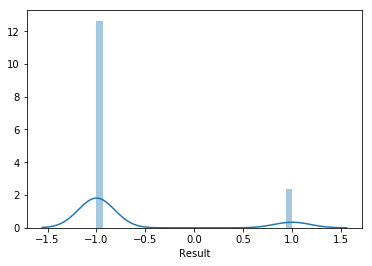

In [11]:
# check skewness for target variable
sb.distplot(dataset['Result'])
print ("Skewness of y is {}".format(dataset['Result'].skew()))

In [12]:
def remove_skew_square():
    print("\nSkewness for Target")
    dataset['Result'] = (np.sqrt(dataset['Result']))
    print("Mean: ",dataset['Result'].mean(),"Median: ", dataset['Result'].median(), 'Skewness is :', dataset['Result'].skew())

    print("Draw histogram")
    plt.hist(dataset['Result'])
    plt.show()
    
# remove_skew_square()
# Here if we remove skewness result gives large amount of NAN values

In [13]:
dataset.isna().sum()

Peptides    0
Result      0
dtype: int64

In [14]:
# Seperate all amino acids
peptides = np.array([[dataset["Peptides"][i][j] for i in range(dataset.shape[0])] for j in range(8)])
peptides.shape

(8, 947)

In [15]:
# Store the seperated amino acids into a dataframe
dataset2 = pd.DataFrame(peptides.T, columns=list('ABCDEFGH'))
dataset2.shape


(947, 8)

In [16]:
dataset2.head()

,A,B,C,D,E,F,G,H
0,A,A,A,G,K,S,G,G
1,A,A,A,V,D,A,G,M
2,A,A,G,K,S,G,G,G
3,A,A,L,A,L,E,Y,G
4,A,A,N,D,G,P,M,P


In [17]:
# assign 2nd dataset to 1st one
dataset = dataset.assign(**dataset2)
#OR
# dataset = pd.concat([dataset,dataset2])
dataset.head()

,Peptides,Result,A,B,C,D,E,F,G,H
0,AAAGKSGG,-1,A,A,A,G,K,S,G,G
1,AAAVDAGM,-1,A,A,A,V,D,A,G,M
2,AAGKSGGG,-1,A,A,G,K,S,G,G,G
3,AALALEYG,1,A,A,L,A,L,E,Y,G
4,AANDGPMP,-1,A,A,N,D,G,P,M,P


In [18]:
# drop unwanted column
dataset = dataset.drop(['Peptides'], axis=1)

In [19]:
dataset = dataset[['A','B','C','D','E','F','G','H','Result']]
dataset.head()

,A,B,C,D,E,F,G,H,Result
0,A,A,A,G,K,S,G,G,-1
1,A,A,A,V,D,A,G,M,-1
2,A,A,G,K,S,G,G,G,-1
3,A,A,L,A,L,E,Y,G,1
4,A,A,N,D,G,P,M,P,-1


In [20]:
print("Dataset shape",dataset.shape)
dataset.head()

Dataset shape (947, 9)


,A,B,C,D,E,F,G,H,Result
0,A,A,A,G,K,S,G,G,-1
1,A,A,A,V,D,A,G,M,-1
2,A,A,G,K,S,G,G,G,-1
3,A,A,L,A,L,E,Y,G,1
4,A,A,N,D,G,P,M,P,-1


In [22]:
# create directory to store csv files
# os.mkdir("CSV_files")

In [89]:
#split dataset into train, test and cross validation also save csv files
obj_util.splitdata(dataset, 0.30, 0.40,"CSV_files" )

train :  (662, 9)  test :  (285, 9)
train_data :  (397, 9)  crossV_data :  (265, 9)


In [90]:
# load train dataset
train_dataset = pd.read_csv ("CSV_files/train_file.csv")
print("Train Dataset has {} rows and {} Columns".format(train_dataset.shape[0],train_dataset.shape[1])) 
# load dataset for Cross Validation
CV_dataset = pd.read_csv ("CSV_files/CValidation_file.csv")
print("Cross validation Dataset has {} rows and {} Columns".format(CV_dataset.shape[0],CV_dataset.shape[1])) 

Train Dataset has 397 rows and 9 Columns
Cross validation Dataset has 265 rows and 9 Columns


In [91]:
#data Preprocessing
train_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 397 entries, 0 to 396
Data columns (total 9 columns):
A         397 non-null object
B         397 non-null object
C         397 non-null object
D         397 non-null object
E         397 non-null object
F         397 non-null object
G         397 non-null object
H         397 non-null object
Result    397 non-null int64
dtypes: int64(1), object(8)
memory usage: 28.0+ KB


In [92]:
train_dataset.head()

,A,B,C,D,E,F,G,H,Result
0,L,F,A,D,V,V,P,K,1
1,N,Q,N,P,I,A,Q,P,-1
2,E,V,E,Q,V,E,L,P,-1
3,E,N,V,V,I,V,A,S,-1
4,F,E,Y,I,E,E,N,K,-1


In [93]:
# seperate fetures and label

x_train = train_dataset.loc[:, train_dataset.columns != 'Result'].values
y_train = train_dataset.loc[:,train_dataset.columns == 'Result'].values

# convert ndarray to dataframe
df1 =  pd.DataFrame(x_train)

print("x_train :",x_train.shape,"& y_train:",y_train.shape)

#for cross validation
x_crossval = CV_dataset.loc[:, CV_dataset.columns != 'Result'].values
y_crossval = CV_dataset.loc[:,CV_dataset.columns == 'Result'].values

# convert ndarray to dataframe
df2 =  pd.DataFrame(x_crossval)
print("x_cv :",x_crossval.shape,"& y_cv:",y_crossval.shape)

x_train : (397, 8) & y_train: (397, 1)
x_cv : (265, 8) & y_cv: (265, 1)


In [94]:
df2.shape

(265, 8)

In [95]:
# Handle categorical data
x_train_dataset = obj_util.Categorical_data(df1)

In [96]:
# Handle categorical data for cross validation dataset
cv_dataset = obj_util.Categorical_data(df2)

In [97]:
x_train_dataset.shape, cv_dataset.shape

((397, 150), (265, 143))

In [85]:
#feature scalling (here data will be converted into float)
def feature_scalling(x_train,x_crossval):
    sc_x = StandardScaler()
    x_train = sc_x.fit_transform(x_train)
    
    sc_x_cv = StandardScaler()
    x_crossval = sc_x.fit_transform(x_crossval)
    
    return sc_x, x_train,sc_x_cv, x_crossval
    
sc_x, x_train,sc_x_cv, x_crossval = feature_scalling(x_train_dataset,cv_dataset)


In [86]:
print(len(x_train), len(x_crossval))

340 228


In [87]:
class LogisticReg():
    
    def create_module(self,x_train,y_train):
        # fitting LogisticRegression to the training set
        classifier = LogisticRegression()
        classifier.fit(x_train,y_train)
        return classifier    
    

def main():
    #class obj created
    obj  = LogisticReg()

    # create Logistic reg module on train dataset
    classifier = obj.create_module(x_train,y_train)
    print("\nModule created")
    print("regression object",type(classifier))

    # y prediction
    y_pre = obj_util.y_prediction(x_train, classifier)
    
    # calculate accuracy
    accuracy_score,average_precision,auc=obj_util.accuracy(y_pre,y_train)
    print('\n\nAverage accuracy_score:' , accuracy_score)
    print('Average precision-recall score: {0:0.2f}'.format(average_precision))
    print('Average Roc-AUC: %.3f' % auc)

    # show confusion matrix
    cm = obj_util.confusion_matrix(y_train,y_pre)
    print("\n\nConfusion Matrix:\n",cm)
#     print("\n\nConfusion Matrix:\n",metrics.confusion_matrix(y_train, y_pre))
#     obj_util.visualization(x_train,y_train, classifier, "Logistic Regression(Training set)", "Peptides", "Result Salary")
    
    # create pickle file for training model
    obj_util.create_piklefile(classifier,'LogisticRegression.pkl' )
    print("\nPikle file created")


if __name__ == '__main__':
    main()



Module created
regression object <class 'sklearn.linear_model.logistic.LogisticRegression'>


Average accuracy_score: 100.0
Average precision-recall score: 100.00
Average Roc-AUC: 100.000


Confusion Matrix:
 [[286   0]
 [  0  54]]

Pikle file created


In [88]:
# cross validation        
def Cross_validation():
    file1 = open('LogisticRegression.pkl', 'rb')
    classifier1 = pickle.load(file1)
 
    # y_prediction ( cross validation) 
    y_predicted1 = obj_util.y_prediction(x_crossval, classifier1)
    print(len(y_predicted1),len(y_crossval))
    # calculate accuracy
    accuracy_score,average_precision,auc=obj_util.accuracy(y_predicted1, y_crossval)
    print('\n\nAverage accuracy_score:' , accuracy_score)
    print('Average precision-recall score: {0:0.2f}'.format(average_precision))
    print('Average Roc-AUC: %.3f' % auc)

    # show confusion matrix
    cm = obj_util.confusion_matrix(y_crossval,y_predicted1)
    print("\n\nConfusion Matrix:\n",cm)
#     print("\n\nConfusion Matrix:\n",metrics.confusion_matrix(y_crossval, y_predicted1))
    
#     obj_util.visualization(x_crossval, y_crossval, classifier1, "Logistic Regression(Training set)", "Age", "Estimate Salary")
    
    
Cross_validation()


228 228


Average accuracy_score: 74.12280701754386
Average precision-recall score: 16.91
Average Roc-AUC: 50.789


Confusion Matrix:
 [[163  27]
 [ 32   6]]
